In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [27]:
#data detailing temperature stats from different weather stations from across the bay
data = pd.read_csv('bay_weather.csv')
print(data.shape)
print(data.columns)
print(data.info())
print(data.isnull().sum())

(1830, 24)
Index(['PDT', 'Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF',
       'Max Dew PointF', 'MeanDew PointF', 'Min DewpointF', 'Max Humidity',
       ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressureIn',
       ' Mean Sea Level PressureIn', ' Min Sea Level PressureIn',
       ' Max VisibilityMiles', ' Mean VisibilityMiles', ' Min VisibilityMiles',
       ' Max Wind SpeedMPH', ' Mean Wind SpeedMPH', ' Max Gust SpeedMPH',
       'PrecipitationIn', ' CloudCover', ' Events', ' WindDirDegrees', 'ZIP'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PDT                         1830 non-null   object 
 1   Max TemperatureF            1830 non-null   int64  
 2   Mean TemperatureF           1830 non-null   int64  
 3   Min TemperatureF            1830 non-null   int64

Preprocessing/Cleaning of the Data

In [28]:
#format columns to make more readable 
old_names = ['Max TemperatureF', 'Min TemperatureF', 'Mean TemperatureF', 'Max Dew PointF', 'MeanDew PointF',
             'Min DewpointF', 'Max Humidity',
             ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressureIn', ' Mean Sea Level PressureIn',
             ' Min Sea Level PressureIn', ' Max VisibilityMiles', ' Mean VisibilityMiles',
             ' Min VisibilityMiles', ' Max Wind SpeedMPH', ' Mean Wind SpeedMPH', ' Max Gust SpeedMPH', 'PrecipitationIn',
             ' CloudCover', ' WindDirDegrees', ' Events']
new_names = ['maxTemp', 'minTemp', 'meanTemp', 'maxDew', 'meanDew', 'minDew', 'maxHum', 'meanHum', 'minHum', 'maxPress',
             'minPress', 'meanPress', 'maxVis', 'meanVis',
             'minVis', 'maxWind', 'meanWind', 'maxGust', 'preIn', 'cloud', 'WindDir', 'events']
data.rename(columns=dict(zip(old_names, new_names)), inplace=True)

In [29]:
data = data.copy()
data = data.drop(columns=['maxVis', 'meanVis', 'minVis', 'maxWind', 'meanWind', 'maxGust', 'preIn', 'events'], axis=1)
# generalize bad temperature reports 
data = data[(data['maxTemp'] <= 110) & (data['minTemp'] >= 25)]

In [90]:
data["PDT"] = pd.to_datetime(data["PDT"])
data

,PDT,maxTemp,meanTemp,minTemp,maxDew,meanDew,minDew,maxHum,meanHum,minHum,maxPress,minPress,meanPress,cloud,WindDir,ZIP
0,2015-09-01,75,67,58,58,56,54,84,67,49,29.93,29.89,29.86,2,245,94107
1,2015-09-02,73,68,62,59,56,54,78,68,57,29.97,29.93,29.90,5,249,94107
2,2015-09-03,70,65,60,57,54,50,84,69,53,29.94,29.89,29.83,2,250,94107
3,2015-09-04,72,64,55,52,50,48,77,61,44,29.90,29.86,29.83,2,233,94107
4,2015-09-05,79,65,51,53,48,44,89,60,30,30.00,29.95,29.90,2,289,94107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1825,2016-08-27,78,70,61,56,54,53,72,59,46,30.04,29.99,29.96,4,231,95113
1826,2016-08-28,79,70,60,56,55,54,84,65,45,30.09,30.06,30.03,4,307,95113
1827,2016-08-29,76,68,60,55,54,53,78,64,49,30.12,30.07,30.01,6,319,95113
1828,2016-08-30,81,70,59,56,54,52,78,60,42,30.04,29.98,29.92,2,315,95113


Separating Our Data into Target & Train sets to Predict Weather

In [43]:
target = 'meanTemp'
y = data[target]
features = ['maxTemp', 'minTemp', 'WindDir']
x = data[features]

#model creation 
xtrain, xval, ytrain, yval = train_test_split(x, y, test_size=0.25, random_state=42)
print(xtrain.shape)
print(xval.shape)
print(ytrain.shape)
print(yval.shape)

(1370, 3)
(457, 3)
(1370,)
(457,)


Model Training through a Random Forest Algorithm to classify

In [57]:
model = make_pipeline(
    SelectKBest(k="all"),
    StandardScaler(),
    RandomForestRegressor(
        n_estimators=100,
        max_depth=50,
        random_state=77,
        n_jobs=-1
    )
)
model.fit(xtrain, ytrain)
ypred = model.predict(xval)

Error Evaluation

In [72]:
errors = abs(ypred - yval)
standardize = 100*errors.apply(lambda x: x/ytrain, 0)
accuracy = 100 - np.mean(standardize)
print("Random Forest Model: ", accuracy, "%")

Random Forest Model:  952     99.544078
1245    99.476534
1272    99.504085
657     99.571710
617     99.528881
          ...    
1133    99.578102
1297    99.520896
863     99.476534
1462    99.578102
1129    99.590331
Length: 1370, dtype: float64 %


c:\Users\celgi\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Plot Predicted and Errors

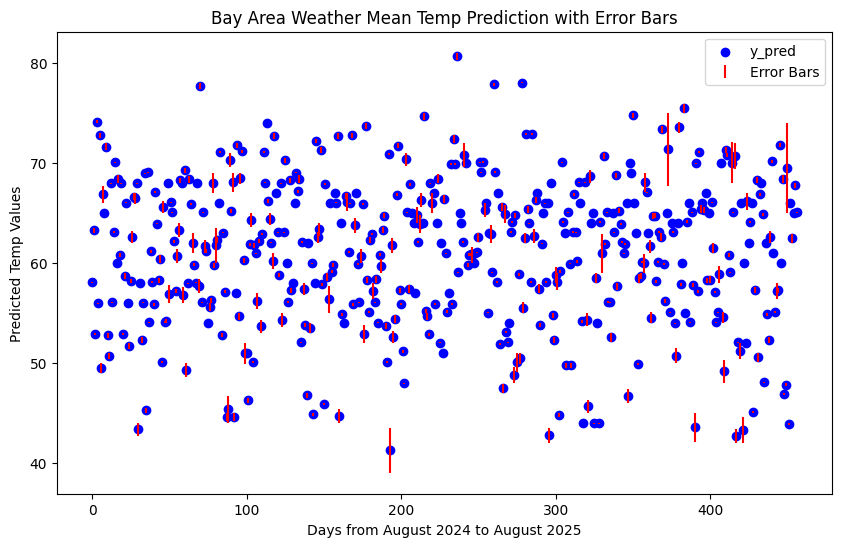

In [105]:
plt.figure(figsize=(10, 6))

plt.errorbar(
    np.arange(len(yval)),
    ypred,
    yerr=errors,
    linestyle='None',
    color='red',  
    label='Error Bars'
)

plt.scatter(np.arange(len(yval)), ypred, label='y_pred', color='blue')
plt.title('Bay Area Weather Mean Temp Prediction with Error Bars')
plt.xlabel('Days from August 2024 to August 2025')
plt.ylabel('Predicted Temp Values')
plt.legend()
plt.show()
